<a href="https://colab.research.google.com/github/HarshSinha-1/MachineLearning/blob/main/Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In [2]:
from google.colab import files
uploaded = files.upload()
import ml_utils as mt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Saving ml_utils.py to ml_utils.py


In [4]:
ld_train=pd.read_csv('/content/sample_data/loan_data_train.csv')

In [5]:
def custom_dir(dir_col):

    temp=dir_col.str.replace('%','')
    num=pd.to_numeric(temp,errors='coerce')

    return num

In [6]:
def custom_fico(fico_col):

    temp=fico_col.str.split('-',expand=True)
    for i in [0,1]:
        temp[i]=pd.to_numeric(temp[i],errors='coerce')
    num=0.5*(temp[0]+temp[1])

    return num


In [7]:
def custom_el(el_col):
    temp=el_col.replace({'5 years':5, '4 years':4, '< 1 year':0,
           '10+ years':10, '2 years':2,'8 years':8,
           '1 year':1, '6 years':6, '7 years':7,
           '3 years':3, '9 years':9})
    num=pd.to_numeric(temp,errors='coerce')
    return num

In [8]:
cat_to_num_cols=['Amount.Requested',
                'Open.CREDIT.Lines','Revolving.CREDIT.Balance']
simple_num_cols=['Monthly.Income','Inquiries.in.the.Last.6.Months']
cat_to_dummies_cols=[ 'Loan.Length','Loan.Purpose',
                    'State','Home.Ownership']
custom_func_cols={'Debt.To.Income.Ratio':custom_dir,
                    'FICO.Range':custom_fico,
                    'Employment.Length':custom_el}

In [9]:
ld_pipe=mt.DataPipe(simple_num=simple_num_cols,
                   cat_to_num=cat_to_num_cols,
                   cat_to_dummies=cat_to_dummies_cols,
                   custom_func_dict=custom_func_cols)

In [10]:
ld_pipe.fit(ld_train)

In [11]:
x_train=ld_pipe.transform(ld_train)

In [12]:
y_train=ld_train['Interest.Rate'].str.replace('%','').astype(float)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression()

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
scores=cross_val_score(lr,x_train,y_train,scoring='neg_mean_absolute_error',cv=10)

In [17]:
scores.mean()

-1.613947935655561

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
effect_df=x_train*lr.coef_
means = effect_df.mean()
mins = effect_df.min()
maxs = effect_df.max()
feature_names = effect_df.columns

<Axes: xlabel='Range', ylabel='Feature'>

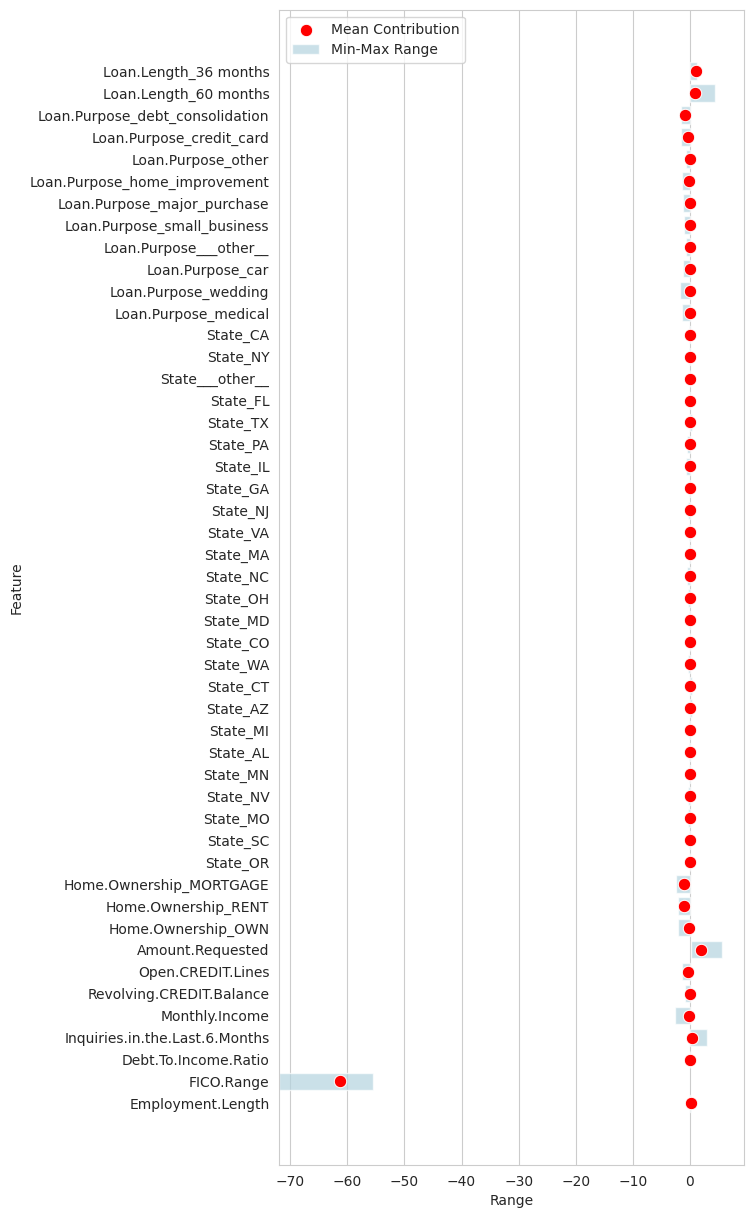

In [20]:
plot_df = pd.DataFrame({'Feature': feature_names, 'Min': mins, 'Max': maxs, 'Mean': means})
plot_df["Range"] = plot_df["Max"] - plot_df["Min"]  # Compute the range

# Create the figure
plt.figure(figsize=(6, 15))
sns.set_style("whitegrid")

# Min-Max range as bars
sns.barplot(x="Range", y="Feature", data=plot_df, orient="h", left=plot_df["Min"],
            color="lightblue", alpha=0.7, label="Min-Max Range")

# Mean contribution as red points
sns.scatterplot(x="Mean", y="Feature", data=plot_df, color="red", s=80, label="Mean Contribution", zorder=3)


# making Predictions on new data set

In [22]:
ld_new=pd.read_csv('/content/sample_data/loan_data_test.csv')

In [23]:
x_new=ld_pipe.transform(ld_new)

In [24]:
y_new_pred=lr.predict(x_new)

# Linear Regression with L2 Penalty [Ridge Regression]

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [26]:
alphas=np.linspace(1,100,100)

In [27]:
params={'alpha':alphas}

In [28]:
model=Ridge()

In [29]:
gs=GridSearchCV(model,
               param_grid=params,
               cv=10,
               scoring='neg_mean_absolute_error',
               verbose=20,
               n_jobs=-1)

In [30]:
gs.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error', verbose=20)

In [31]:
mt.report(gs.cv_results_)

Model with rank: 1
Mean validation score: -1.604686 (std: 0.117972)
Parameters: {'alpha': 49.0}

Model with rank: 2
Mean validation score: -1.604688 (std: 0.118008)
Parameters: {'alpha': 50.0}

Model with rank: 3
Mean validation score: -1.604691 (std: 0.117942)
Parameters: {'alpha': 48.0}



# Refining the value of hyperparameter

In [32]:
alphas=np.linspace(48,50,25)

In [33]:
params={'alpha':alphas}

In [34]:
gs=GridSearchCV(model,
               param_grid=params,
               cv=10,
               scoring='neg_mean_absolute_error',
               verbose=20,
               n_jobs=-1)

In [35]:
gs.fit(x_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([48.        , 48.08333333, 48.16666667, 48.25      , 48.33333333,
       48.41666667, 48.5       , 48.58333333, 48.66666667, 48.75      ,
       48.83333333, 48.91666667, 49.        , 49.08333333, 49.16666667,
       49.25      , 49.33333333, 49.41666667, 49.5       , 49.58333333,
       49.66666667, 49.75      , 49.83333333, 49.91666667, 50.        ])},
             scoring='neg_mean_absolute_error', verbose=20)

In [36]:
mt.report(gs.cv_results_)

Model with rank: 1
Mean validation score: -1.604686 (std: 0.117972)
Parameters: {'alpha': 49.0}

Model with rank: 2
Mean validation score: -1.604686 (std: 0.117974)
Parameters: {'alpha': 49.083333333333336}

Model with rank: 3
Mean validation score: -1.604686 (std: 0.117969)
Parameters: {'alpha': 48.916666666666664}



In [37]:
ridge_model=Ridge(**{'alpha': 49.0})

In [38]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=49.0)

In [39]:
ridge_model.intercept_

73.66145735251673

In [40]:
list(zip(x_train.columns,ridge_model.coef_))

[('Loan.Length_36 months', -1.4065860163353736),
 ('Loan.Length_60 months', 1.5192873826632474),
 ('Loan.Purpose_debt_consolidation', -0.32871597062282526),
 ('Loan.Purpose_credit_card', -0.4135475867317495),
 ('Loan.Purpose_other', 0.37696315948090253),
 ('Loan.Purpose_home_improvement', -0.18759658132025747),
 ('Loan.Purpose_major_purchase', 0.004418771180646562),
 ('Loan.Purpose_small_business', 0.10268365336772448),
 ('Loan.Purpose___other__', 0.21801395405345292),
 ('Loan.Purpose_car', -0.02202353294002968),
 ('Loan.Purpose_wedding', -0.2528046866125776),
 ('Loan.Purpose_medical', -0.06783395692486874),
 ('State_CA', -0.06775364424090143),
 ('State_NY', -0.02276203190389989),
 ('State___other__', 0.10656856559032035),
 ('State_FL', 0.03854395129370194),
 ('State_TX', 0.4148171876182083),
 ('State_PA', -0.2409447626383029),
 ('State_IL', -0.29590986112006884),
 ('State_GA', -0.0650709819105054),
 ('State_NJ', -0.17018417373680175),
 ('State_VA', 0.015220839871643658),
 ('State_MA',

In [41]:
simple_lm=LinearRegression()
simple_lm.fit(x_train,y_train)

LinearRegression()

In [42]:
list(zip(x_train.columns,simple_lm.coef_/ridge_model.coef_))

[('Loan.Length_36 months', -0.9191347849792948),
 ('Loan.Length_60 months', 2.9353604424191486),
 ('Loan.Purpose_debt_consolidation', 4.553105940557035),
 ('Loan.Purpose_credit_card', 3.9007158112443636),
 ('Loan.Purpose_other', -1.80549425734802),
 ('Loan.Purpose_home_improvement', 7.552624208448669),
 ('Loan.Purpose_major_purchase', -258.56433310198867),
 ('Loan.Purpose_small_business', -9.765916009900947),
 ('Loan.Purpose___other__', -3.3596158333094714),
 ('Loan.Purpose_car', 56.59804169103674),
 ('Loan.Purpose_wedding', 6.818793388375158),
 ('Loan.Purpose_medical', 19.599560588578427),
 ('State_CA', 3.2225048391293565),
 ('State_NY', 9.824668673035555),
 ('State___other__', -0.13567596917873662),
 ('State_FL', -2.2811284398881906),
 ('State_TX', 1.0136341422300814),
 ('State_PA', 2.147255604937674),
 ('State_IL', 2.0819916754871155),
 ('State_GA', 3.8607968252761),
 ('State_NJ', 2.4487682250754705),
 ('State_VA', -10.05996806273367),
 ('State_MA', -47.26615688950119),
 ('State_NC'

# Linear Regression with L1 Penalty [Lasso Regression]

In [43]:
from sklearn.linear_model import Lasso
model=Lasso()

In [44]:
alphas=np.linspace(1,100,100)
params={'alpha':alphas}

In [45]:
gs=GridSearchCV(model,
               param_grid=params,
               cv=10,
               scoring='neg_mean_absolute_error',
               verbose=20,
               n_jobs=-1)

In [46]:
gs.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error', verbose=20)

In [47]:
mt.report(gs.cv_results_)

Model with rank: 1
Mean validation score: -1.938738 (std: 0.135372)
Parameters: {'alpha': 1.0}

Model with rank: 2
Mean validation score: -1.939281 (std: 0.135008)
Parameters: {'alpha': 2.0}

Model with rank: 3
Mean validation score: -1.940121 (std: 0.134499)
Parameters: {'alpha': 3.0}



In [48]:
alphas=np.linspace(0,2,100)
params={'alpha':alphas}
gs=GridSearchCV(model,
               param_grid=params,
               cv=10,
               scoring='neg_mean_absolute_error',
               verbose=20,
               n_jobs=-1)
gs.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0....
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494949,
       1.51515152, 1.53535354, 1.55555556, 1.57575758, 1.5959596 ,
       1.61616162, 1.63636364, 1.65656566, 1.67676768, 1.6969697 ,
       1.71717172, 1.73737374, 1.75757576, 1.77777778, 1.7979798 ,
       1.81818182, 1.83838384, 1.85858586, 1.87878788, 1.8989899 ,
       1.91919192, 1.93939394, 1.95959596, 1.97979798, 2.        ])},
             scoring='neg_mean_absolute_error', verbose=20)

In [49]:
mt.report(gs.cv_results_)

Model with rank: 1
Mean validation score: -1.600141 (std: 0.121669)
Parameters: {'alpha': 0.020202020202020204}

Model with rank: 2
Mean validation score: -1.609023 (std: 0.127732)
Parameters: {'alpha': 0.04040404040404041}

Model with rank: 3
Mean validation score: -1.613882 (std: 0.120412)
Parameters: {'alpha': 0.0}



In [50]:
lasso_model=Lasso(**{'alpha': 0.020202020202020204})

In [51]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.020202020202020204)

In [52]:
lasso_model.intercept_

72.02232895710794

In [53]:
list(zip(x_train.columns,lasso_model.coef_))

[('Loan.Length_36 months', -0.0),
 ('Loan.Length_60 months', 3.0389735233617),
 ('Loan.Purpose_debt_consolidation', -0.17958931453400814),
 ('Loan.Purpose_credit_card', -0.22925613325292818),
 ('Loan.Purpose_other', 0.3268452945363773),
 ('Loan.Purpose_home_improvement', -0.0),
 ('Loan.Purpose_major_purchase', 0.0),
 ('Loan.Purpose_small_business', 0.0),
 ('Loan.Purpose___other__', 0.0),
 ('Loan.Purpose_car', 0.0),
 ('Loan.Purpose_wedding', -0.0),
 ('Loan.Purpose_medical', -0.0),
 ('State_CA', -0.0),
 ('State_NY', 0.0),
 ('State___other__', 0.0),
 ('State_FL', 0.0),
 ('State_TX', 0.27205732113215897),
 ('State_PA', -0.0),
 ('State_IL', -0.0),
 ('State_GA', -0.0),
 ('State_NJ', -0.0),
 ('State_VA', 0.0),
 ('State_MA', 0.0),
 ('State_NC', -0.0),
 ('State_OH', -0.0),
 ('State_MD', 0.0),
 ('State_CO', 0.0),
 ('State_WA', -0.0),
 ('State_CT', 0.0),
 ('State_AZ', 0.0),
 ('State_MI', 0.0),
 ('State_AL', 0.0),
 ('State_MN', -0.0),
 ('State_NV', 0.0),
 ('State_MO', -0.0),
 ('State_SC', 0.0),
 (

In [54]:
(lasso_model.coef_==0).sum() # number of features where the coefficients have become exactly zero
# you could very well built this again with only this features which have non-zero coefficients here

34